# Pandas 시각화
판다시 자체적으로 matplotlib 를 기반으로 한 시각화기능을 지원한다.    
Series나 DataFrame에 plot() 함수나 plot accessor를 사용한다.
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## plot() 
- kind 매개변수에 지정한 값에 따라 다양한 그래프를 그릴 수 있다.
- kind : 그래프 종류 지정
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot

matplotlib를 이용해 여러 설정들 가능

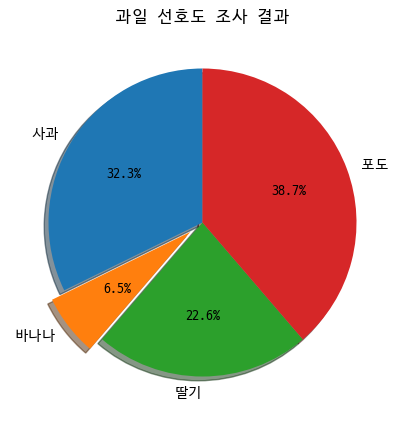

In [2]:
values = pd.Series([100,20,70,120], index=['사과','바나나','딸기','포도'])
values.plot(kind='pie',             # kind = 그래프 종류
            figsize=(5,5),          # figsize = 그래프 크기
            autopct='%1.1f%%',      # plt.pie()의 인자들을 전달
            startangle=90,
            # counterclock=False,
            shadow=True,
            explode=(0,0.1,0,0))
plt.title('과일 선호도 조사 결과')
plt.show()

## 막대 그래프
- index가 무슨 값인지를 가리키는 축으로 사용된다.

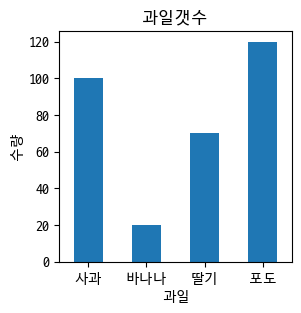

In [3]:
values.plot.bar(                    # .plot plt의 함수를 연결해주는 accessor 
                                    # .plot.bar() => values의 값을 이용해 plt.bar()를 실행
                title='과일갯수',
                figsize=(3,3),
                xlabel='과일',
                ylabel='수량',
                rot=0,              # rot = x축 라벨의 회전 각도
                )   
plt.show()

In [4]:
tips = pd.read_csv(r'./data/tips.csv')

In [5]:
result = tips['day'].value_counts()

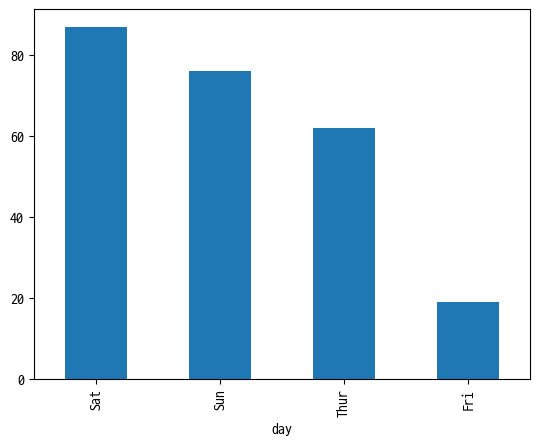

In [6]:
result.plot(kind='bar');

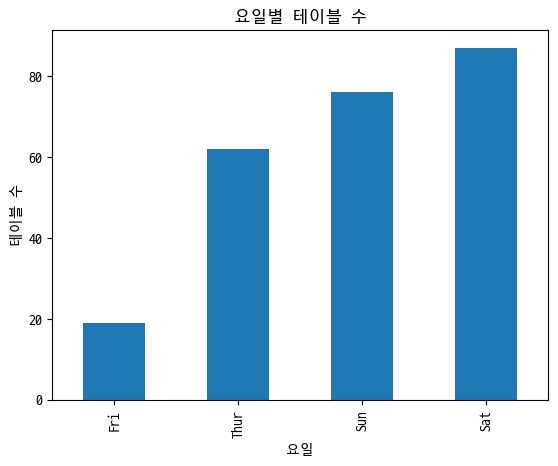

In [7]:
result.sort_values().plot(kind='bar',
                        title='요일별 테이블 수',
                        xlabel='요일',
                        ylabel='테이블 수',
                        );

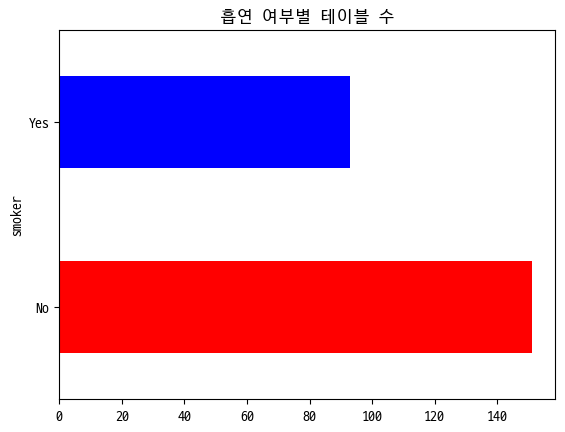

In [8]:
# 흡연 여부별 테이블수
tips['smoker'].value_counts().plot(kind='barh',
                                    title='흡연 여부별 테이블 수',
                                    color=['red', 'blue'],
                                    );

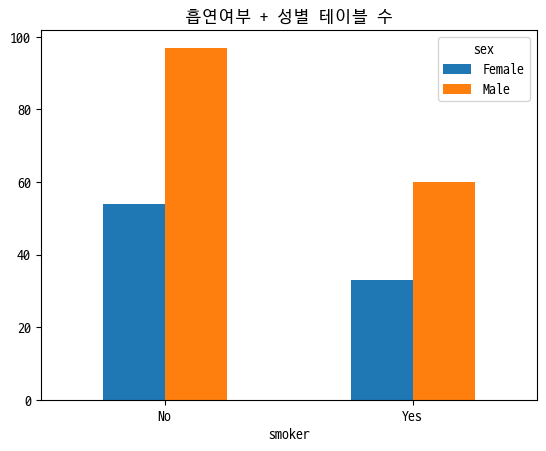

In [13]:
# 흡연여부 + 성별 테이블 수
agg_df = tips.pivot_table(index='smoker', columns='sex', values='tip', aggfunc='count')
agg_df.plot(kind='bar', rot=0, title='흡연여부 + 성별 테이블 수');

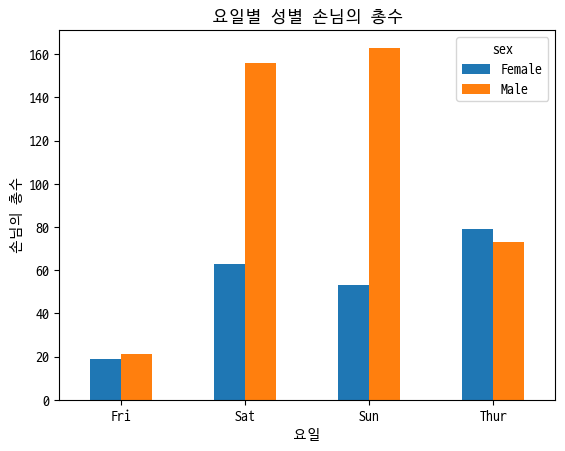

In [10]:
# 요일별 성별 손님의 총수 (size의 sum)
sum_df = tips.pivot_table(index='day', columns='sex', values='size', aggfunc='sum')
sum_df.plot(kind='bar',
            rot=0,
            title='요일별 성별 손님의 총수',
            xlabel='요일',
            ylabel='손님의 총수',
            );

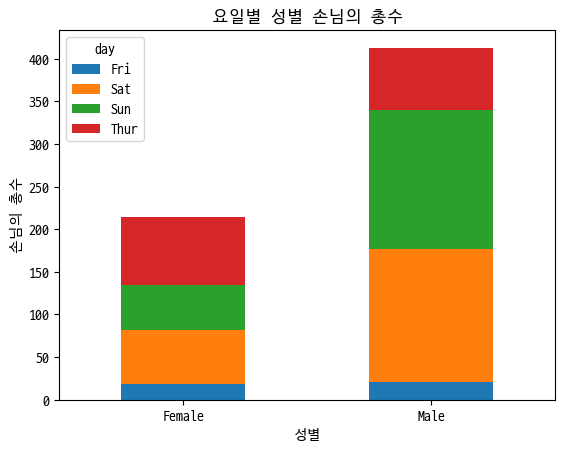

In [11]:
# 요일별 성별 손님의 총수 (size의 sum)
sum_df = tips.pivot_table(index='sex', columns='day', values='size', aggfunc='sum')
sum_df.plot(kind='bar',
            rot=0,
            title='요일별 성별 손님의 총수',
            xlabel='성별',
            ylabel='손님의 총수',
            stacked=True,    # 쌓아서 표현
            );

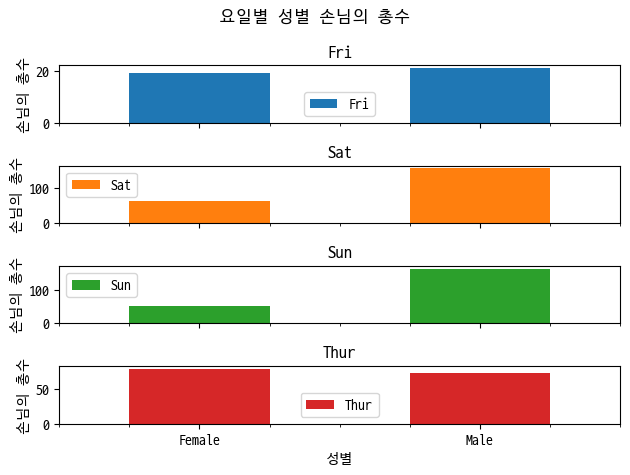

In [12]:
# 요일별 성별 손님의 총수 (size의 sum)
sum_df = tips.pivot_table(index='sex', columns='day', values='size', aggfunc='sum')
sum_df.plot(kind='bar',
            rot=0,
            title='요일별 성별 손님의 총수',
            xlabel='성별',
            ylabel='손님의 총수',
            subplots=True,    # 각각의 그래프로 표현
            );
plt.tight_layout()
plt.show()

- 두개의 분류 별로 그리기
    - 여러개의 컬럼일 경우 수평 누적 막대그래프를 그린다.


## 파이차트

In [14]:
import pandas as pd
tips = pd.read_csv(r'./data/tips.csv')

In [15]:
tips['day'].value_counts() # 요일별 테이블 수

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [17]:
tips['day'].value_counts(normalize=True) # 요일별 테이블 비율

day
Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: proportion, dtype: float64

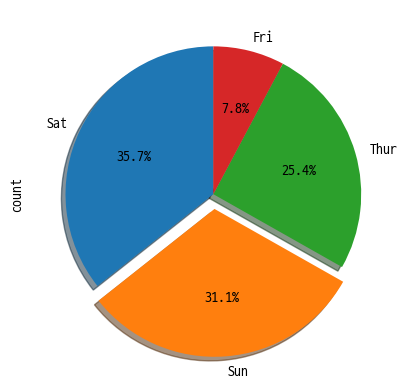

In [22]:
# 요일별 테이블 수
tips['day'].value_counts().plot(kind='pie',         # kind = 그래프 종류
                                autopct='%1.1f%%',  # plt.pie()의 인자들을 전달
                                startangle=90,      # 시작 각도
                                shadow=True,        # 그림자
                                explode=(0,0.1,0,0),# 간격
                                
                                );

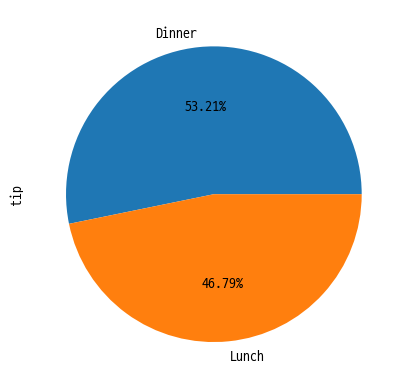

In [23]:
# 점심/저녁별 팁의 평균
tips.groupby('time')['tip'].mean().plot(kind='pie',
                                        autopct='%.2f%%',
                                        );

## 히스토그램, KDE(밀도그래프)
 - KDE : 커널 밀도 추정 그래프

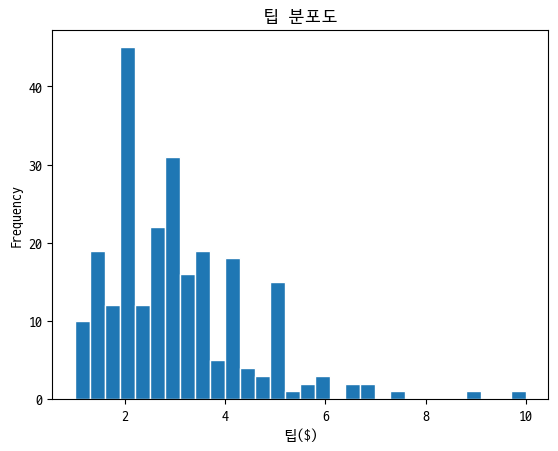

In [27]:
tips['tip'].plot(kind='hist',
                bins=30,
                title='팁 분포도',
                xlabel='팁($)',
                edgecolor='white',
                );

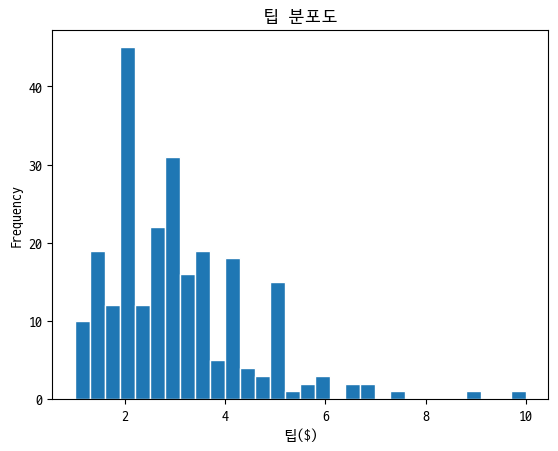

In [28]:
tips['tip'].plot.hist(              # .plot plt의 함수를 연결해주는 accessor를 이용
                bins=30,
                title='팁 분포도',
                xlabel='팁($)',
                edgecolor='white',
                );

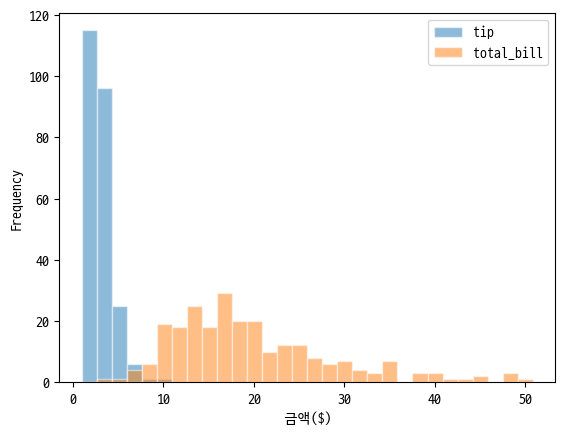

In [35]:
tips[['tip', 'total_bill']].plot(kind='hist',       # 여러개의 컬럼을 한번에 그리기
                                bins=30,
                                xlabel='금액($)',
                                edgecolor='white',
                                alpha=0.5,          # 투명도
                                );         

<Axes: ylabel='Density'>

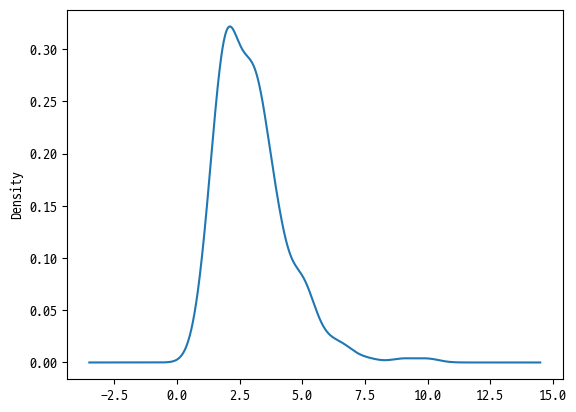

In [38]:
tips['tip'].plot(kind='kde',    # kde = 커널 밀도 추정 : 히스토그램을 부드럽게 표현
                )

<Axes: ylabel='Density'>

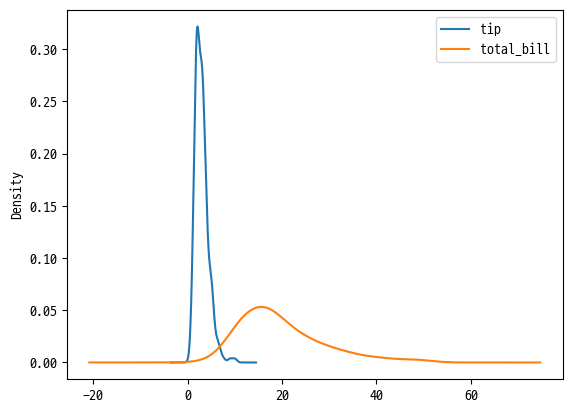

In [40]:
tips[['tip', 'total_bill']].plot(kind='kde',    # kde = 커널 밀도 추정 : 히스토그램을 부드럽게 표현
                                                # 여러개의 컬럼을 한번에 그리기
                                )

## Boxplot (상자그래프)

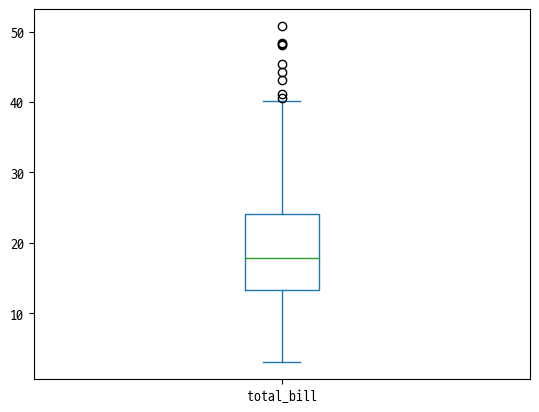

In [48]:
tips['total_bill'].plot(kind='box',      # boxplot
                        );

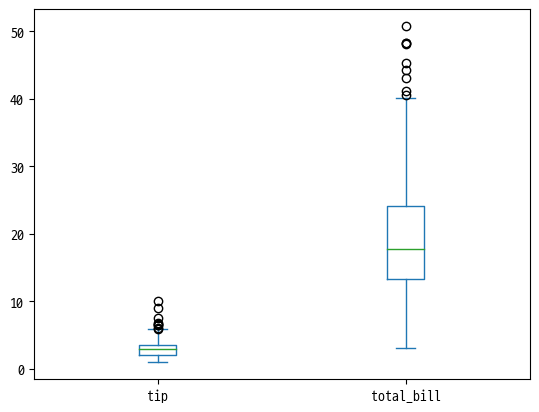

In [52]:
# tips[['tip','total_bill']].plot(kind='box',      # 여러개의 컬럼을 한번에 그리기
#                                 );
tips[['tip','total_bill']].plot.box(             # 같은 결과
                                );

<Axes: >

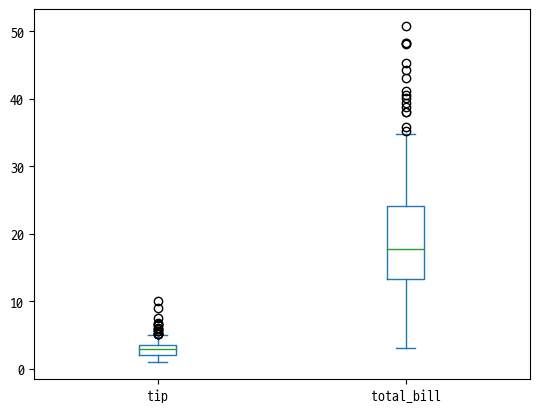

In [55]:
tips[['tip','total_bill']].plot(kind='box',
                                whis=1.0,       # 이상치 기준값 -> default = 1.5
                                )               # 1분위수 - whis * IQR 부터 
                                                # 3분위수 + whis * IQR 사이의 값이 정상범위
                                                # (3분위수 - 1분위수) = IQR

## scatter plot (산점도) 

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


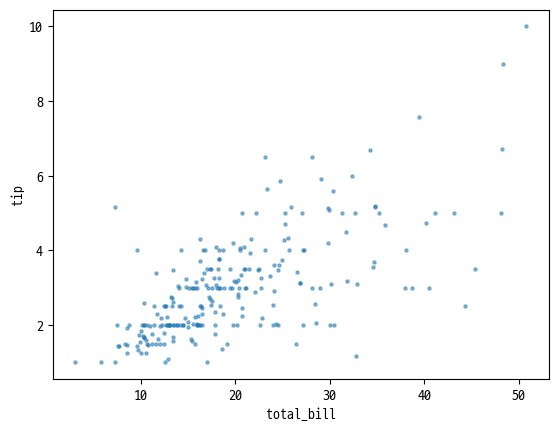

In [66]:
# df를 이용해 그림
tips.plot(kind='scatter',   # df에서 그리기
        x='total_bill',     # x축에 사용할 컬럼을 지정
        y='tip',            # y축에 사용할 컬럼을 지정
        marker='.',         # 마커 모양
        alpha=0.5,          # 투명도
        );
tips[['tip', 'total_bill']].corr() # 상관계수

In [68]:
df = pd.read_excel(r'./data/강수량.xlsx', index_col='계절')
df.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017
계절,,,,,,,,,
봄,231.3,302.9,256.9,256.5,264.3,215.9,223.2,312.8,118.6
여름,752.0,692.6,1053.6,770.6,567.5,599.8,387.1,446.2,609.7
가을,143.1,307.6,225.5,363.5,231.2,293.1,247.7,381.6,172.5
겨울,142.3,98.7,45.6,139.3,59.9,76.9,109.1,108.1,75.6


<Axes: >

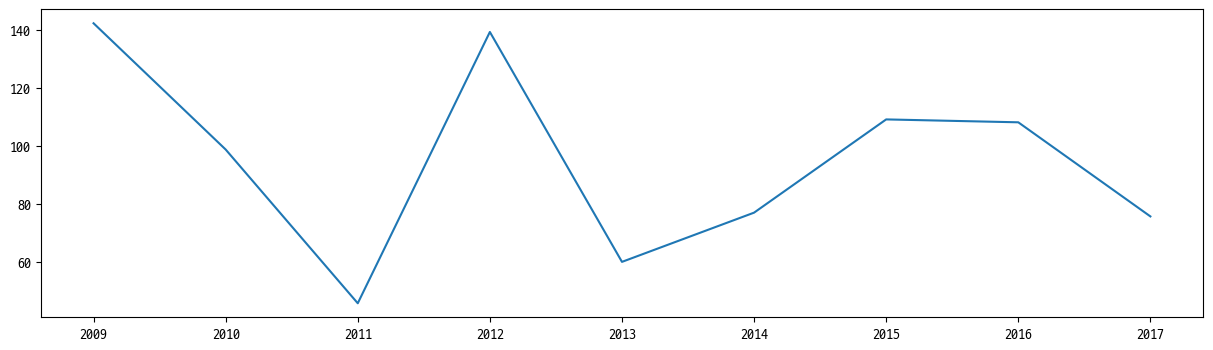

In [71]:
df.loc['겨울'].plot(figsize=(15,4)) # 기본설정은 선그래프

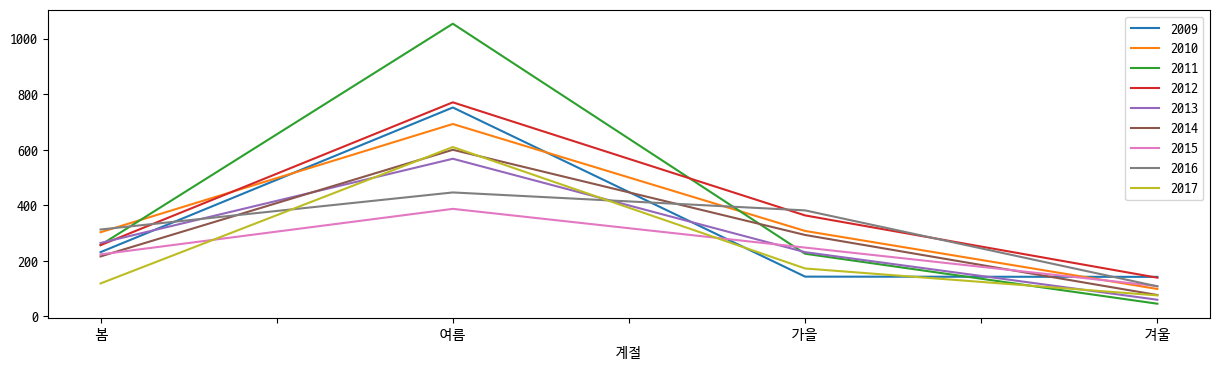

In [76]:
df.plot(figsize=(15,4)); # df에서 기본설정은 인덱스를 x축으로, 
                         # 컬럼별 선그래프로 그려짐

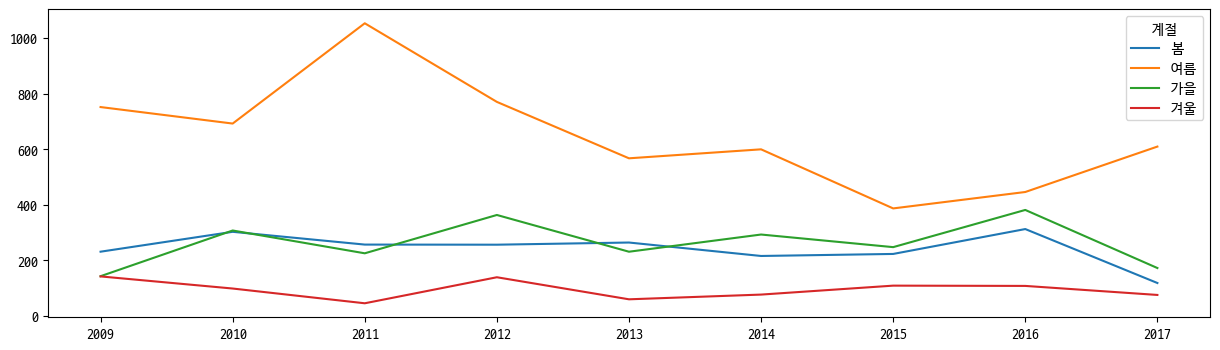

In [77]:
df.transpose().plot(figsize=(15,4)); # 행과 열을 바꾸고 그리기

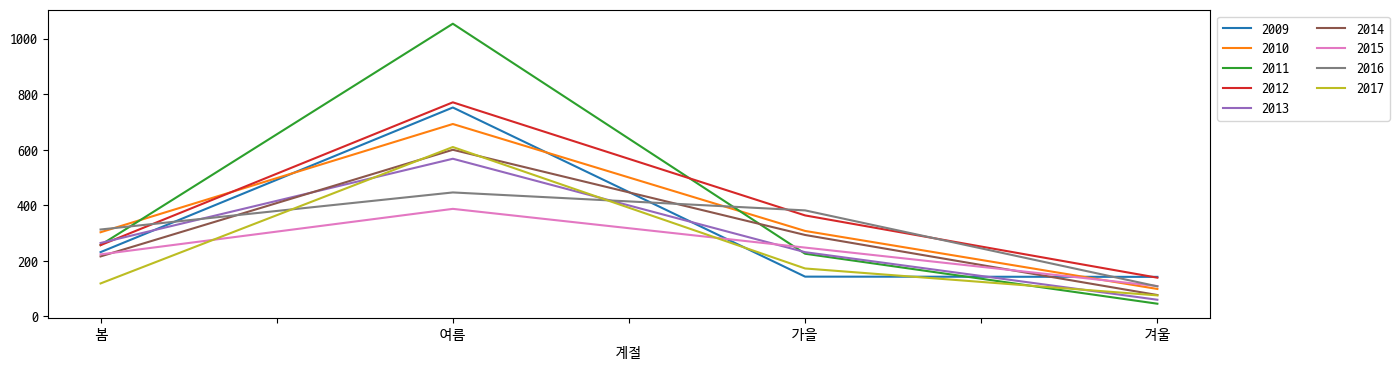

In [80]:
df.plot(figsize=(15,4))
plt.legend(bbox_to_anchor=(1, 1),
            loc='upper left',       # 범례 위치 조정
            ncol=2                  # 범례의 열 개수
            ) 